#📌 Extracción

In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [296]:
datos= pd.read_json("TelecomX_Data.json")
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [297]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [298]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [299]:
pd.unique('Churn')

<ipython-input-299-2607308316>:1: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.unique('Churn')


array(['Churn'], dtype=object)

In [300]:
datos_c = pd.json_normalize(datos ['customer'])
datos_p = pd.json_normalize(datos ['phone'])
datos_i = pd.json_normalize(datos ['internet'])
datos_a = pd.json_normalize(datos ['account'])

In [301]:
pd.unique(datos['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [302]:
datos['Churn'] = datos['Churn'].astype(bool)

In [303]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   bool  
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: bool(1), object(5)
memory usage: 291.1+ KB


In [304]:
datos_c['gender'] = datos_c['gender'].str.lower()
datos_c['Partner'] = datos_c['Partner'].astype(bool)
datos_c['Dependents'] = datos_c['Dependents'].astype(bool)

In [305]:
datos_p['PhoneService'] = datos_p['PhoneService'].astype(bool)
datos_p['MultipleLines'] = datos_p['MultipleLines'].astype(bool)

In [306]:
datos_i['InternetService'] = datos_i['InternetService'].str.lower()
datos_i['OnlineSecurity'] = datos_i['OnlineSecurity'].astype(bool)
datos_i['OnlineBackup'] = datos_i['OnlineBackup'].astype(bool)
datos_i['DeviceProtection'] = datos_i['DeviceProtection'].astype(bool)
datos_i['TechSupport'] = datos_i['TechSupport'].astype(bool)
datos_i['StreamingTV'] = datos_i['StreamingTV'].astype(bool)
datos_i['StreamingMovies'] = datos_i['StreamingMovies'].astype(bool)

In [307]:
datos_a['Contract'] = datos_a['Contract'].str.lower()
datos_a['Contract'] = datos_a['Contract'].astype(str).apply(lambda x: x.replace ('-',' '))
datos_a['PaperlessBilling'] = datos_a['PaperlessBilling'].astype(bool)
datos_a['PaymentMethod'] = datos_a['PaymentMethod'].str.lower()
datos_a['Charges.Total'] = pd.to_numeric(datos_a['Charges.Total'], errors='coerce').astype(np.float64)

## ***Columna de cuentas diarias***

In [311]:
datos['Cuentas_Diarias'] = datos_a['Charges.Monthly'] / 30

In [313]:
datos.head()

,customerID,Churn,customer,phone,internet,account,Cuentas_Diarias
0,0002-ORFBO,True,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",2.186667
1,0003-MKNFE,True,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",1.996667
2,0004-TLHLJ,True,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",2.463333
3,0011-IGKFF,True,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",3.266667
4,0013-EXCHZ,True,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",2.796667


#📊 Carga y análisis

In [318]:
datos.describe()

,Cuentas_Diarias
count,7267.000000
mean,2.157337
std,1.004319
min,0.608333
25%,1.180833
50%,2.343333
75%,2.995833
max,3.958333


In [319]:
datos_c.describe()

,SeniorCitizen,tenure
count,7267.000000,7267.000000
mean,0.162653,32.346498
std,0.369074,24.571773
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [320]:
datos_i.describe()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7267,7267,7267,7267,7267,7267,7267
unique,3,1,1,1,1,1,1
top,fiber optic,True,True,True,True,True,True
freq,3198,7267,7267,7267,7267,7267,7267


In [321]:
datos_p.describe()

,PhoneService,MultipleLines
count,7267,7267
unique,1,1
top,True,True
freq,7267,7267


In [322]:
datos_a.describe()

,Charges.Monthly,Charges.Total
count,7267.000000,7256.000000
mean,64.720098,2280.634213
std,30.129572,2268.632997
min,18.250000,18.800000
25%,35.425000,400.225000
50%,70.300000,1391.000000
75%,89.875000,3785.300000
max,118.750000,8684.800000


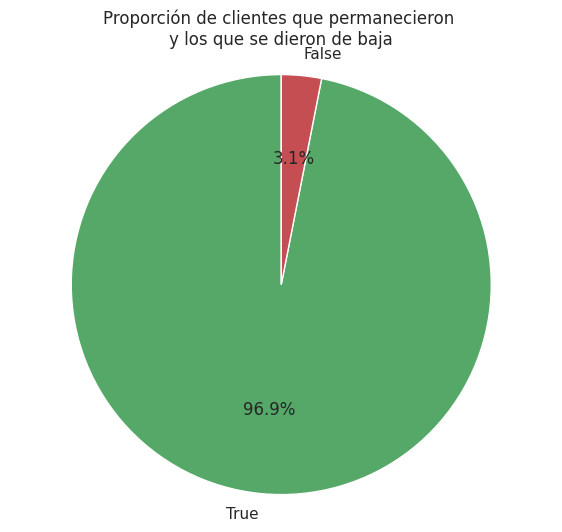

In [335]:
sns.set_palette('rocket')

Churn_counts = datos['Churn'].value_counts()

plt.figure(figsize=(7, 6))
plt.pie(Churn_counts, labels=Churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['g', 'r'])
plt.title('Proporción de clientes que permanecieron \ny los que se dieron de baja')
plt.axis('equal')  # para que el círculo no salga ovalado
plt.show()

###  ***Churn por género***

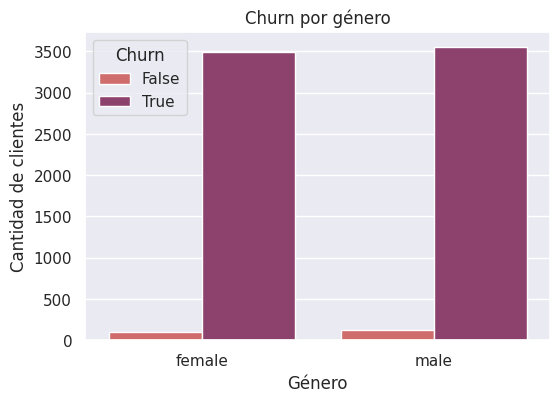

In [360]:
datos_c['Churn'] = datos['Churn']

fig, ax = plt.subplots(figsize=(6, 4))

sns.countplot(x='gender', hue='Churn', data=datos_c, palette='flare', ax=ax)
ax.set_title('Churn por género')
ax.set_xlabel('Género')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Churn')
plt.show() # Add plt.show() to display the plot

###  ***Churn por tipo de contrato***

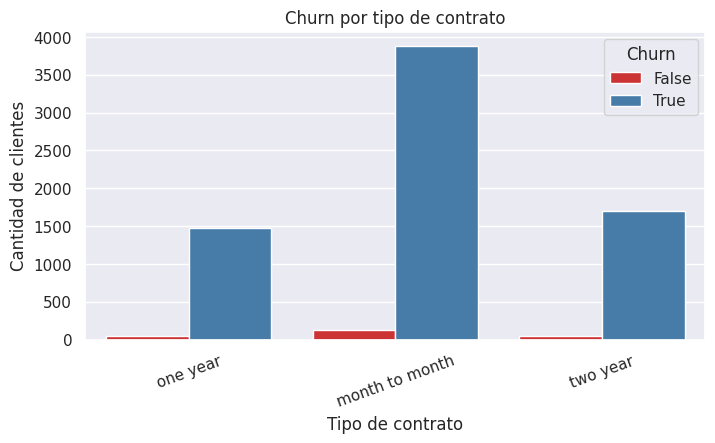

In [344]:
datos_a['Churn'] = datos['Churn']

fig, ax = plt.subplots(figsize=(8, 4))

sns.countplot(x='Contract', hue='Churn', data=datos_a, palette='Set1', ax=ax)
ax.set_title('Churn por tipo de contrato')
ax.set_xlabel('Tipo de contrato')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Churn')
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()

### ***Churn por método de pago***

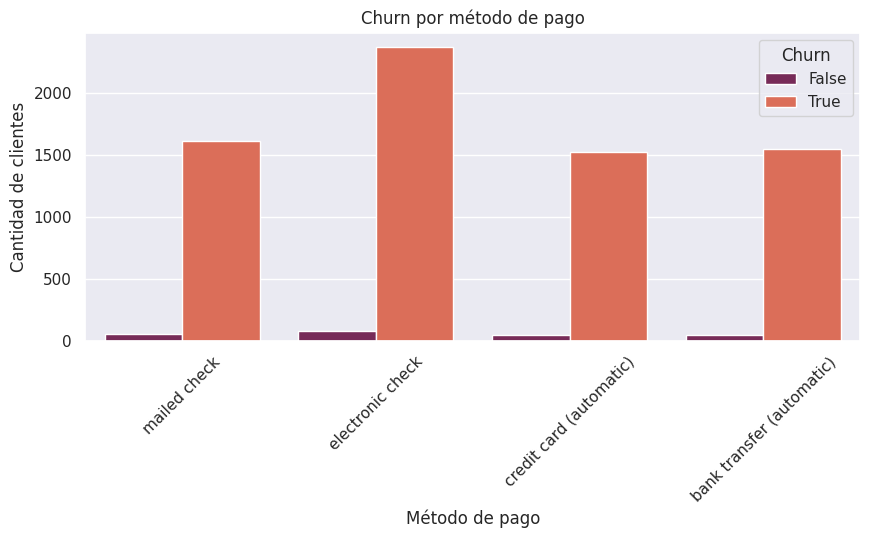

In [361]:
datos_a['Churn'] = datos['Churn']

fig, ax = plt.subplots(figsize=(10, 4))

sns.countplot(x='PaymentMethod', hue='Churn', data=datos_a, palette='rocket', ax=ax)
ax.set_title('Churn por método de pago')
ax.set_xlabel('Método de pago')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Churn')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

#📄Informe final

###  ***Total gastado vs Churn***

<ipython-input-359-2877963811>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=datos, palette='viridis', ax=ax)


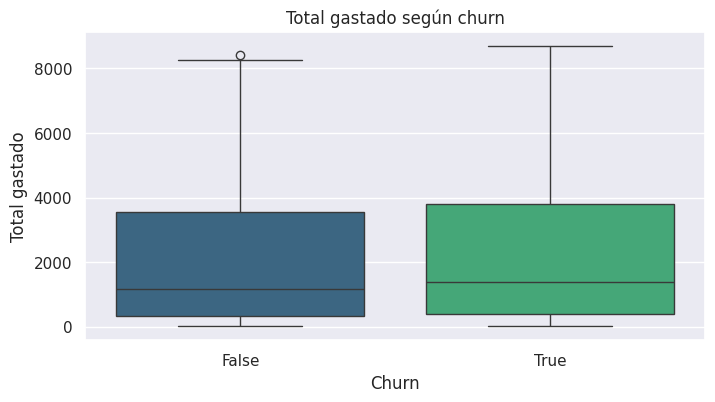

In [359]:
datos['Charges.Total'] = datos_a['Charges.Total']

fig, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(x='Churn', y='Charges.Total', data=datos, palette='viridis', ax=ax)
ax.set_title('Total gastado según churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Total gastado')
plt.show()

# 📄 Informe Final – Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción

El presente análisis tiene como objetivo comprender los factores que influyen en la **evasión de clientes (Churn)** en una empresa de telecomunicaciones. La retención de clientes es crítica para la sostenibilidad del negocio, y mediante el análisis de datos históricos podemos identificar patrones asociados con la cancelación de servicios. Este estudio busca proveer **insights valiosos para prevenir futuras pérdidas de clientes**.

---

## 🔹 Limpieza y Tratamiento de Datos

Se realizó una adecuada preparación del conjunto de datos, que incluyó los siguientes pasos:

- Importación del archivo `TelecomX_Data.json` y su descomposición en subtablas (`customer`, `phone`, `internet`, `account`).
- Conversión de variables categóricas a formatos adecuados (`object` a `bool`, `str`, o `float`).
- Normalización de textos a minúsculas para asegurar uniformidad.
- Conversión de montos como `"Charges.Total"` a valores numéricos (`float`) usando `pd.to_numeric`.
- Creación de la variable **"Cuentas_Diarias"**, que permite observar el gasto promedio diario del cliente.

Esta limpieza garantiza que los datos estén listos para el análisis exploratorio y evitan sesgos por formatos incorrectos.

---

## 🔹 Análisis Exploratorio de Datos

Se emplearon diversas visualizaciones para explorar la variable `Churn`:

- 📊 **Gráfico de pastel**: mostró que existe una proporción significativa de clientes que cancelan el servicio.
- 📈 **Gráficos de barras segmentados**: se analizaron variables categóricas como género, tipo de contrato y método de pago para identificar diferencias entre clientes que permanecen y los que se van.
- 📉 **Boxplots y violin plots**: permitieron visualizar la relación de variables numéricas como **"Total gastado"** y **"tenure"** con la evasión.

Estos gráficos revelaron **diferencias notables** en el comportamiento y características de los clientes según su estado de churn.

---

## 🔹 Conclusiones e Insights

Los principales hallazgos fueron:

- Los clientes con **contratos mensuales** presentan mayores tasas de evasión en comparación con contratos a plazo fijo.
- Ciertos métodos de pago como el **cargo automático con tarjeta** presentan menor churn.
- Usuarios con **menor tiempo de permanencia (tenure)** y **bajo total de gasto** son más propensos a cancelar.
- Las características de servicio como **protección de dispositivo** y **respaldo en línea** están asociadas a menor churn cuando están activas.

---

## 🔹 Recomendaciones

Basado en el análisis, se sugieren las siguientes acciones:

1. 💬 **Fidelización temprana**: Ofrecer beneficios en los primeros meses para reducir churn inicial.
2. 📅 **Promover contratos a largo plazo** mediante descuentos o servicios exclusivos.
3. 💳 **Incentivar métodos de pago más estables**, como el débito automático.
4. 🛡️ **Ampliar el uso de servicios adicionales** (seguridad, respaldo), ya que parecen asociarse con una mayor retención.
5. 📊 **Monitorear los perfiles con bajo gasto y poca permanencia** para intervenciones personalizadas.

---

Este informe consolida el proceso completo de análisis, desde la extracción y limpieza de datos hasta la interpretación visual y estratégica. Estos hallazgos pueden alimentar modelos predictivos futuros y campañas enfocadas en la retención de clientes. 🚀
